In [11]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
import gc

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv(r"/content/drive/MyDrive/Battery data/full_battery_data.csv")
print(f"✅ Loaded full dataset: {df.shape}")

✅ Loaded full dataset: (9047247, 7)


In [14]:
df.head()

,Time,Voltage,Current,Temperature,SOC,DriveCycle,TemperatureLabel
0,0.0,4.175155,-3.691549e-06,15.96381,1.0,PDTCB,15
1,0.1,4.175155,-9.512327e-07,15.96381,1.0,PDTCB,15
2,0.2,4.174967,-4.821614e-07,15.96381,1.0,PDTCB,15
3,0.3,4.175153,-2.413463e-07,15.96381,1.0,PDTCB,15
4,0.4,4.174966,-8.059866e-08,15.96381,1.0,PDTCB,15


In [15]:
df.tail()

,Time,Voltage,Current,Temperature,SOC,DriveCycle,TemperatureLabel
9047242,11025.7,2.656538,-3.350742,8.943850,0.125165,US06,5
9047243,11025.8,2.655582,-3.351976,8.943850,0.125146,US06,5
9047244,11025.9,2.654630,-3.353234,8.945311,0.125128,US06,5
9047245,11026.0,2.653594,-3.354528,8.947360,0.125109,US06,5
9047246,11026.1,2.450127,-9.408817,8.947360,0.125090,US06,5


In [16]:
# 2. Normalize SOC if needed
if df["SOC"].max() > 1.0:
    df["SOC"] = df["SOC"] / 100.0

# 3. Select features and target
features = ['Voltage', 'Current', 'Temperature']
target = 'SOC'

X = df[features].values
y = df[target].values

In [17]:
# Cleanup to save memory
del df
gc.collect()

31

In [18]:
# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"✅ Train: {X_train.shape}, Test: {X_test.shape}")

✅ Train: (7237797, 3), Test: (1809450, 3)


In [19]:
# 5. KNN model
knn_model = KNeighborsRegressor(
    n_neighbors=5,
    weights='distance',  # Closer neighbors have more influence
    n_jobs=-1            # Use all CPU cores
)


In [20]:
print("⏳ Training KNN model (note: KNN is lazy learner)...")
knn_model.fit(X_train, y_train)  # Fast — no actual "training"
print("✅ KNN model ready (lazy fit complete).")

⏳ Training KNN model (note: KNN is lazy learner)...
✅ KNN model ready (lazy fit complete).


In [29]:
# 6. Save model
joblib.dump(knn_model, "knn_soc_model_.pkl")
print("✅ Model saved as 'knn_soc_model_9M.pkl'")

✅ Model saved as 'knn_soc_model_9M.pkl'


In [25]:
# 7. Predict & evaluate
y_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [23]:
print(f"📊 MAE:  {mae:.5f}")
print(f"📊 RMSE: {rmse:.5f}")
print(f"📊 R²:   {r2:.5f}")

📊 MAE:  0.00027
📊 RMSE: 0.00272
📊 R²:   0.99989


/tmp/ipython-input-24-4232118175.py:10: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


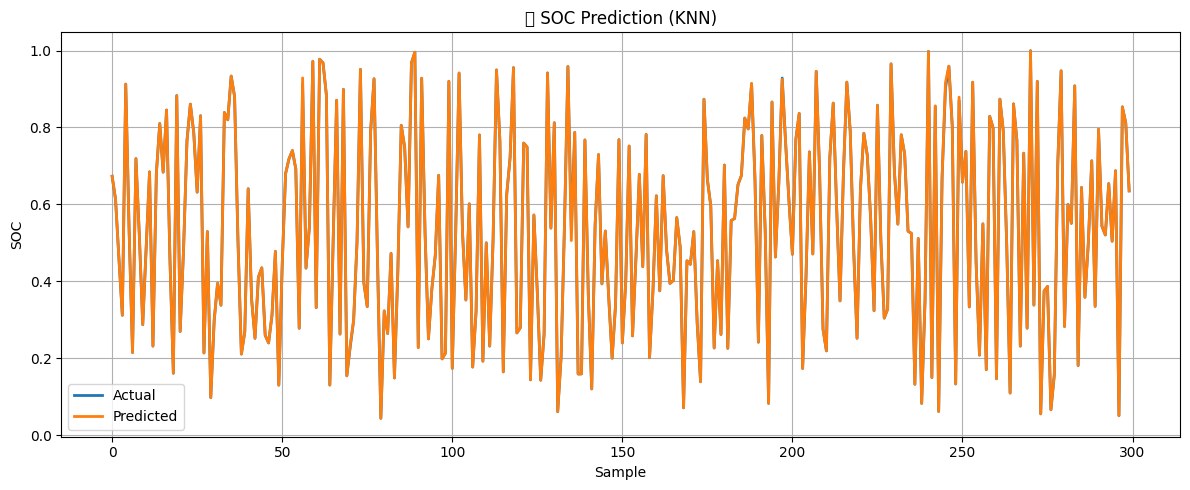

In [24]:
# 8. Plot predictions
plt.figure(figsize=(12, 5))
plt.plot(y_test[:300], label='Actual', linewidth=2)
plt.plot(y_pred[:300], label='Predicted', linewidth=2)
plt.title("🔋 SOC Prediction (KNN)")
plt.xlabel("Sample")
plt.ylabel("SOC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-27-2857438373.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


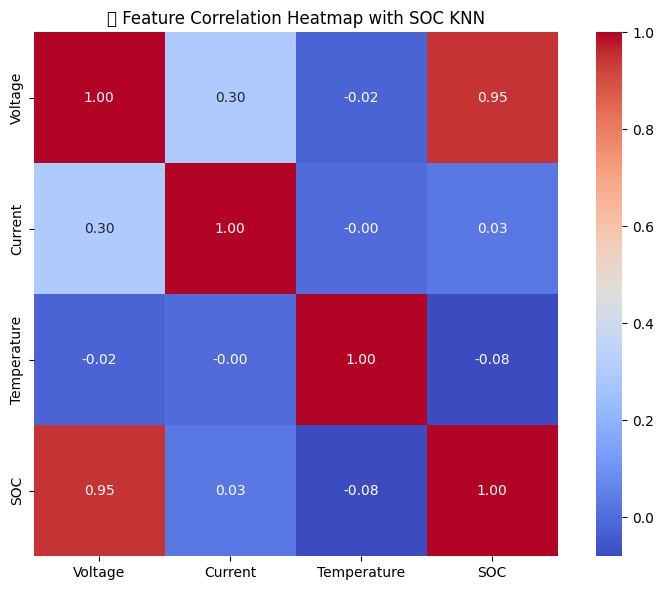

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine into DataFrame again if you used NumPy arrays
df_corr = pd.DataFrame(X_test, columns=['Voltage', 'Current', 'Temperature'])
df_corr['SOC'] = y_test

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("📊 Feature Correlation Heatmap with SOC KNN")
plt.tight_layout()
plt.show()


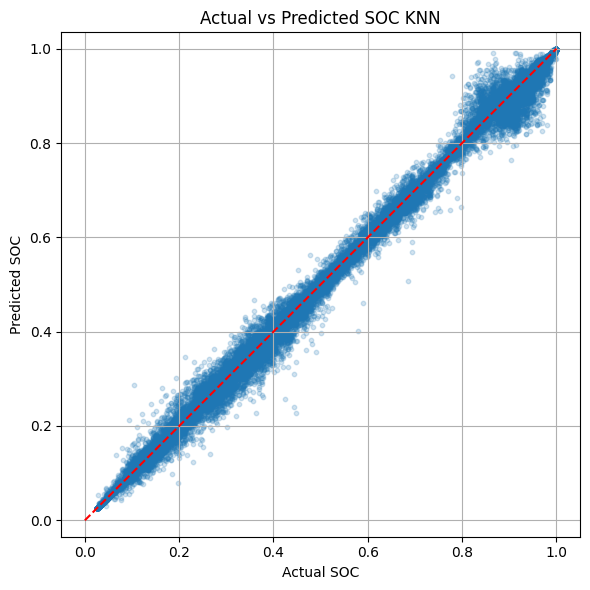

In [28]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2, s=10)
plt.plot([0, 1], [0, 1], 'r--')  # Ideal line
plt.title("Actual vs Predicted SOC KNN")
plt.xlabel("Actual SOC")
plt.ylabel("Predicted SOC")
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()
